In [1]:
pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install yfinance

In [3]:
pip install matplotlib.pyplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot


In [ ]:
pip install pandas 

In [5]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
pip install cloudmesh-common

In [ ]:
pip install tensorflow

In [8]:
from cloudmesh.common.StopWatch import StopWatch
from tensorflow import keras
from pandas.plotting import register_matplotlib_converters
from sklearn.metrics import mean_squared_error
import pathlib
import math
from pathlib import Path

In [9]:
cryptoName = input('"BNB-USD", "XRP-USD","LTC-USD", and "SOL-USD"')
print(cryptoName+' selected')

"BNB-USD", "XRP-USD","LTC-USD", and "SOL-USD"BNB-USD
BNB-USD selected


In [10]:
StopWatch.start("Overall time")

# Creating desktop path to save figures to the desktop
desktop = pathlib.Path.home() / 'Desktop'
desktop2 = str(Path(desktop))
fullpath = desktop2 + "\\"+cryptoName+"-prediction-model.png"
fullpath2 = desktop2 + "\\"+cryptoName+"-prediction-model-zoomed.png"
fullpath3 = desktop2 + "\\"+cryptoName+"-price.png"
fullpath4 = desktop2 + "\\"+cryptoName+"-training-loss.png"
pdfpath = desktop2 + "\\"+cryptoName+"-prediction-model.pdf"
pdfpath2 = desktop2 + "\\"+cryptoName+"-prediction-model-zoomed.pdf"
pdfpath3 = desktop2 + "\\"+cryptoName+"-price.pdf"
pdfpath4 = desktop2 + "\\"+cryptoName+"-training-loss.pdf"
pdfpath5 = desktop2 + "\\"+cryptoName+"-epoch.pdf"


register_matplotlib_converters()

In [11]:
ticker = yf.Ticker(cryptoName)
data = ticker.history(period = "max", interval = "1d")
#print(data)
# Sort the dataframe according to the date
data.sort_values('Date', inplace=True, ascending=True)

# Print the dataframe top
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-11-09,2.05314,2.17423,1.89394,1.99077,19192200,0,0
2017-11-10,2.00773,2.06947,1.64478,1.79684,11155000,0,0
2017-11-11,1.78628,1.91775,1.61429,1.67047,8178150,0,0
2017-11-12,1.66889,1.67280,1.46256,1.51969,15298700,0,0
2017-11-13,1.52601,1.73502,1.51760,1.68662,12238800,0,0


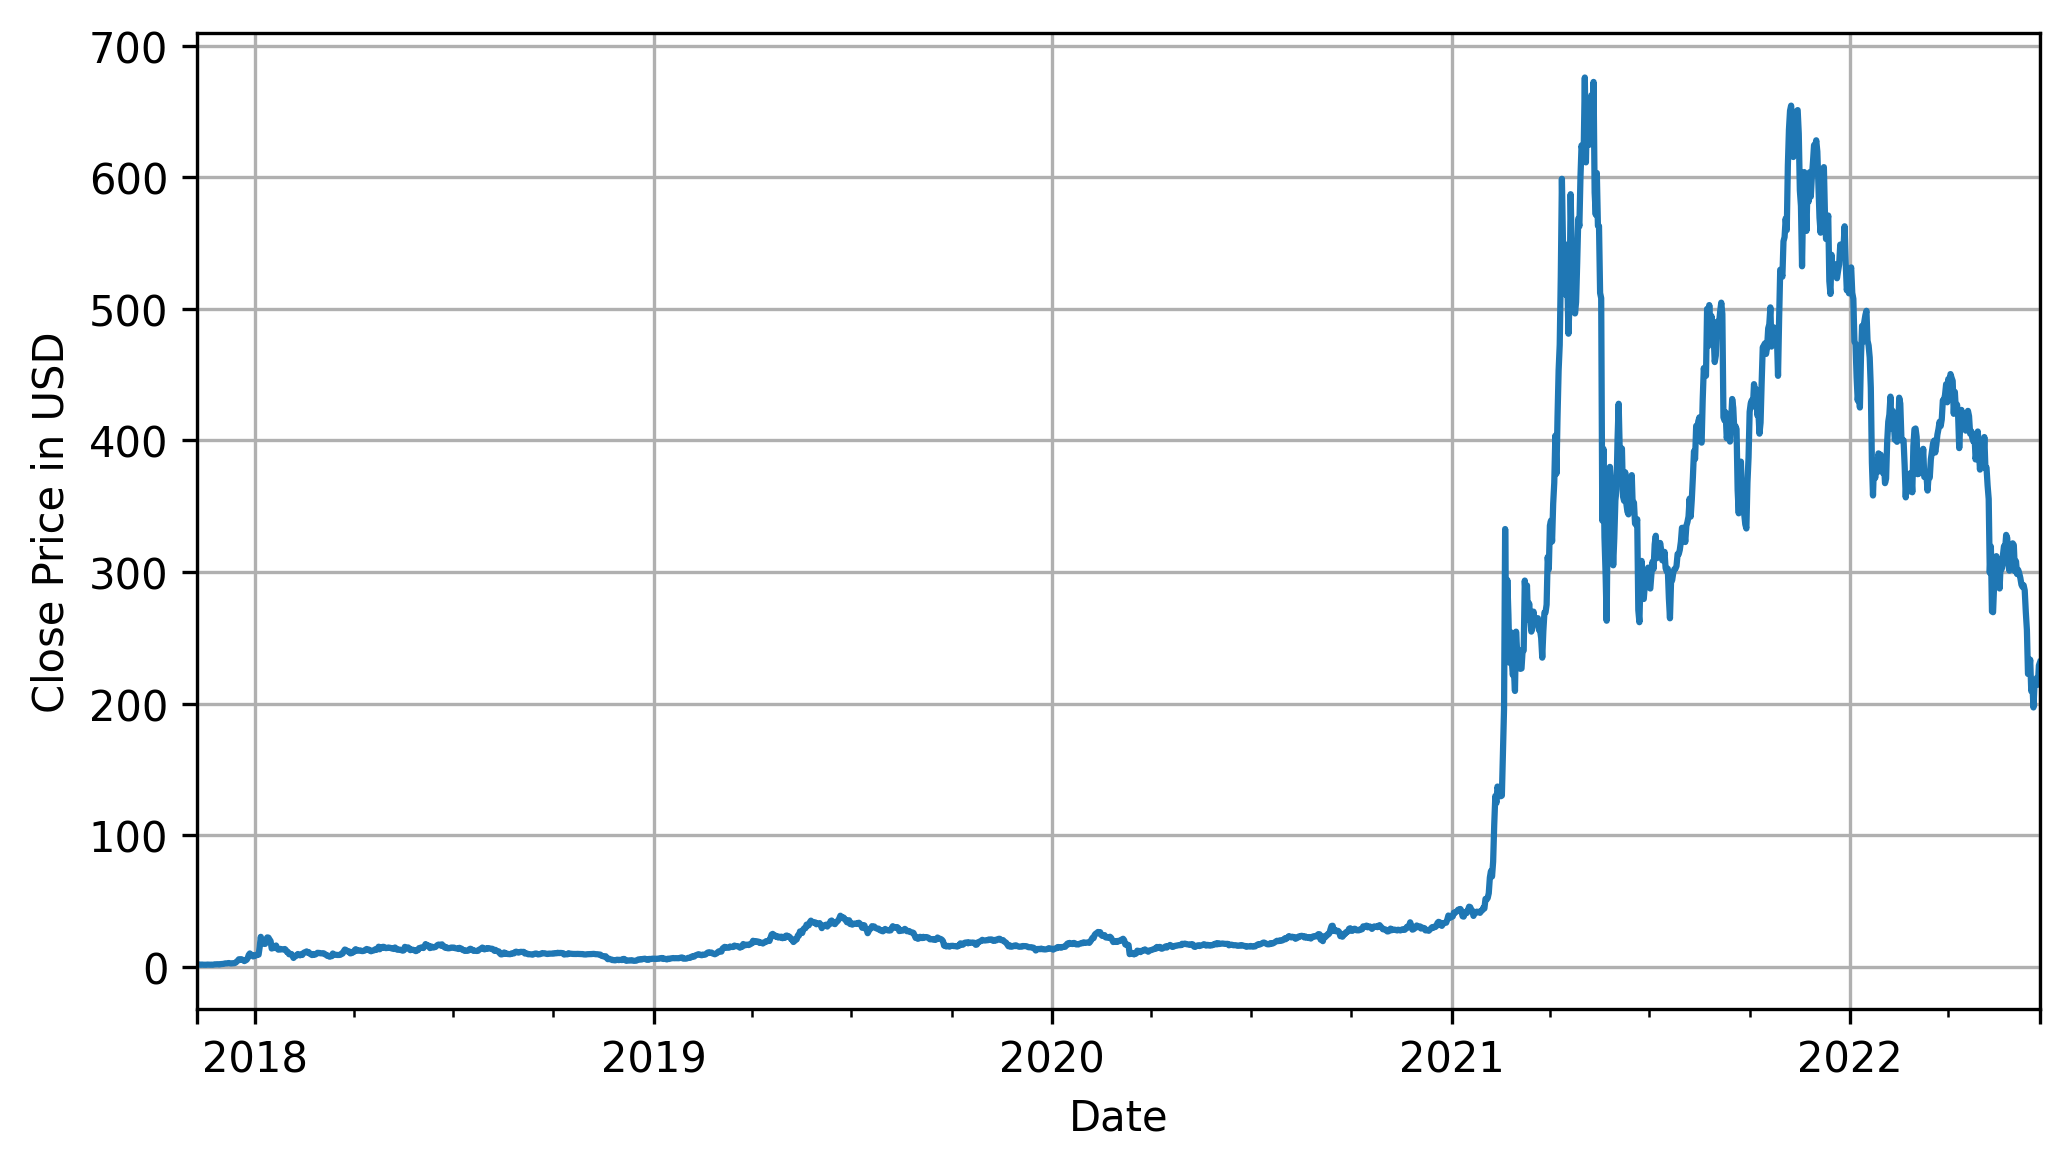

In [15]:
# Visualization of data. Plotting the price close.
plt.figure(num=None, figsize=(7, 4), dpi=300, facecolor='w', edgecolor='k')
data['Close'].plot()
plt.tight_layout()
plt.grid()
plt.ylabel('Close Price in USD')
plt.xlabel('Date')
plt.tight_layout()
#plt.savefig(fullpath3, dpi=300, facecolor="#FFFFFF")
plt.savefig(pdfpath3, dpi=300)
plt.show()

In [16]:
print(data.index[0])
firstDate = data.index[0]
firstDateFormatted = pd.to_datetime(data.index[0], utc=False)
print(firstDateFormatted)
date_time_obj = firstDateFormatted.to_pydatetime()
trueFirstDate = date_time_obj.strftime('%m/%d/%Y')
print(trueFirstDate)

2017-11-09 00:00:00
2017-11-09 00:00:00
11/09/2017


In [17]:
print(data.head())

               Open     High      Low    Close    Volume  Dividends  \
Date                                                                  
2017-11-09  2.05314  2.17423  1.89394  1.99077  19192200          0   
2017-11-10  2.00773  2.06947  1.64478  1.79684  11155000          0   
2017-11-11  1.78628  1.91775  1.61429  1.67047   8178150          0   
2017-11-12  1.66889  1.67280  1.46256  1.51969  15298700          0   
2017-11-13  1.52601  1.73502  1.51760  1.68662  12238800          0   

            Stock Splits  
Date                      
2017-11-09             0  
2017-11-10             0  
2017-11-11             0  
2017-11-12             0  
2017-11-13             0  


In [18]:
# Get Close data
df = data[['Close']].copy()
# Split data into train and test
train, test = df.iloc[0:-200], df.iloc[-200:len(df)]

print(len(train), len(test))

#切割train & test data

1489 200


In [19]:
train_max = train.max()
train_min = train.min()

# Normalize the dataframes
train = (train - train_min)/(train_max - train_min)
test = (test - train_min)/(train_max - train_min)


In [20]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)


time_steps = 10

X_train, y_train = create_dataset(train, train.Close, time_steps)
X_test, y_test = create_dataset(test, test.Close, time_steps)

In [21]:
StopWatch.start("Training time")

model = keras.Sequential()
model.add(keras.layers.LSTM(250, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1))
model.compile(loss='mae', optimizer='adam')
model.summary()

history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    shuffle=False
)

StopWatch.stop("Training time")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 250)               252000    
                                                                 
 dropout (Dropout)           (None, 250)               0         
                                                                 
 dense (Dense)               (None, 1)                 251       
                                                                 
Total params: 252,251
Trainable params: 252,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
47/47 [==============================] - 4s 34ms/step - loss: 0.0334
Epoch 2/100
47/47 [==============================] - 2s 34ms/step - loss: 0.0434
Epoch 3/100
47/47 [==============================] - 2s 33ms/step - loss: 0.0218
Epoch 4/100
47/47 [==============================] - 2s 34ms/step - los

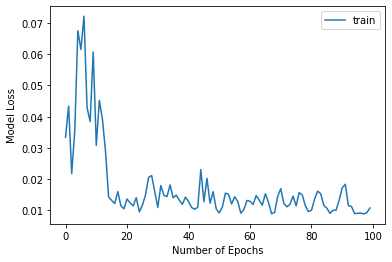

In [22]:
# Plotting the loss
plt.plot(history.history['loss'], label='train')
plt.legend();
plt.ylabel('Model Loss')
plt.xlabel('Number of Epochs')
plt.savefig(pdfpath4, dpi=300)
plt.show()

In [23]:
StopWatch.start("Prediction time")

y_pred = model.predict(X_test)

StopWatch.stop("Prediction time")

# Rescale the data back to the original scale
y_test = y_test*(train_max[0] - train_min[0]) + train_min[0]
y_pred = y_pred*(train_max[0] - train_min[0]) + train_min[0]
y_train = y_train*(train_max[0] - train_min[0]) + train_min[0]

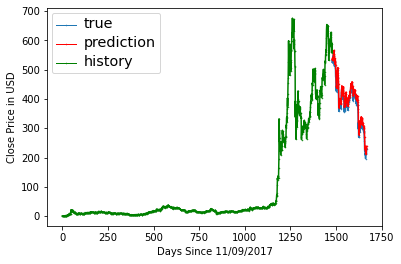

In [24]:
# Plotting the results
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test.flatten(), marker='.', markersize=1, label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred.flatten(), 'r', marker='.', markersize=1, label="prediction")
plt.plot(np.arange(0, len(y_train)), y_train.flatten(), 'g', marker='.', markersize=1, label="history")
plt.ylabel('Close Price in USD')
plt.xlabel('Days Since '+trueFirstDate)
leg = plt.legend()
leg_lines = leg.get_lines()
leg_texts = leg.get_texts()
plt.setp(leg_lines, linewidth=1)
plt.setp(leg_texts, fontsize='x-large')
plt.savefig(pdfpath, dpi=300)
#doge plt.axis([1350, 1450, 0.14, 0.35])
#btc plt.axis([2490, 2650, 34000, 73000])
#eth plt.axis([1370, 1490, 2200, 5800])
#plt.axis([1440, 1500, 2, 6])
#plt.title('5 Epochs', fontsize=20)
plt.savefig(pdfpath5, dpi=300)
plt.show()

In [25]:
print(y_test.shape)
print(y_pred.shape)

(190,)
(190, 1)


In [26]:
mean_squared_error(y_test, y_pred
                  )

386.83717367926147

In [27]:
## Outputs error in United States Dollars
math.sqrt(mean_squared_error(y_test, y_pred))

## Create a table of the error against the number of epochs

19.668176673989418

In [ ]:
StopWatch.stop("Overall time")
StopWatch.benchmark()


+------------------+--------------------------------------------------------------------+
| Attribute        | Value                                                              |
|------------------+--------------------------------------------------------------------|
| cpu              |                                                                    |
| cpu_cores        | 4                                                                  |
| cpu_count        | 8                                                                  |
| cpu_threads      | 8                                                                  |
| frequency        | scpufreq(current=1792.0, min=0.0, max=1992.0)                      |
| mem.available    | 2.6 GiB                                                            |
| mem.free         | 2.6 GiB                                                            |
| mem.percent      | 66.8 %                                                             |
| mem.tot